# 차이 검정 실습
- 귀무가설: 2월 아파트 가격의 평균과 3월 아파트 가격의 평균은 같다.
- 대립가설: 2월 아파트 가격의 평균과 3월 아파트 가격의 평균은 같지 않다.
- p-value >= 0.05: 귀무가설 채택
- p-value < 0.05: 귀무가설 기각 (= 대립가설 채택)

In [2]:
from pingouin import ttest
import pandas as pd

seoul = pd.read_csv("./data/seoul_real_estate.csv", parse_dates=["CTRT_DAY"])
seoul['month'] = seoul["CTRT_DAY"].dt.month
apt_df = seoul[(seoul['BLDG_USG']=='아파트') & (seoul['month'].isin([2, 3]))]
apt_df

,RCPT_YR,CGG_CD,CGG_NM,STDG_CD,STDG_NM,LOTNO_SE,LOTNO_SE_NM,MNO,SNO,BLDG_NM,...,ARCH_AREA,LAND_AREA,FLR,RGHT_SE,RTRCN_DAY,ARCH_YR,BLDG_USG,DCLR_SE,OPBIZ_RESTAGNT_SGG_NM,month
0,2025,11230,동대문구,10400,전농동,1.0,대지,690.0,0.0,래미안크레시티,...,84.960,0.0,16.0,NaN,NaN,2014.0,아파트,중개거래,서울 동대문구,3
1,2025,11230,동대문구,10500,답십리동,1.0,대지,1003.0,0.0,래미안위브,...,59.970,0.0,12.0,NaN,NaN,2014.0,아파트,중개거래,서울 동대문구,3
6,2025,11590,동작구,10200,상도동,1.0,대지,533.0,0.0,힐스테이트 상도 프레스티지,...,84.951,0.0,13.0,NaN,NaN,2013.0,아파트,직거래,NaN,3
8,2025,11410,서대문구,10600,천연동,1.0,대지,145.0,0.0,천연뜨란채,...,57.780,0.0,8.0,NaN,NaN,2006.0,아파트,중개거래,서울 서대문구,3
9,2025,11680,강남구,10400,청담동,1.0,대지,30.0,33.0,청담대림이-편한세상,...,81.840,0.0,3.0,NaN,NaN,2002.0,아파트,중개거래,서울 강남구,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,2025,11440,마포구,10300,신공덕동,1.0,대지,170.0,0.0,브라운스톤공덕아파트,...,59.890,0.0,17.0,NaN,NaN,2009.0,아파트,직거래,NaN,2
10991,2025,11740,강동구,10700,암사동,1.0,대지,509.0,0.0,선사현대아파트,...,59.640,0.0,6.0,NaN,NaN,2000.0,아파트,중개거래,서울 강동구,2
10996,2025,11590,동작구,10200,상도동,1.0,대지,531.0,0.0,힐스테이트 상도 센트럴파크,...,84.609,0.0,4.0,NaN,NaN,2012.0,아파트,중개거래,서울 동작구,2
10997,2025,11470,양천구,10200,목동,1.0,대지,911.0,0.0,목동신시가지6,...,65.100,0.0,3.0,NaN,NaN,1986.0,아파트,중개거래,서울 양천구,2


In [3]:
apt_df.groupby('month')['THING_AMT'].agg(["mean", "std", "size"])

,mean,std,size
month,,,
2,141237.634928,99355.113339,4306
3,116309.405650,74638.737646,2761


In [4]:
feb_df = apt_df[apt_df['month']==2]
mar_df = apt_df[apt_df['month']==3]
ttest(feb_df['THING_AMT'], mar_df['THING_AMT'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.007212,6891.262011,two-sided,6.921588e-33,"[20858.42, 28998.03]",0.27543,2.326e+29,NaN


### 결과표 해석
- t-value: t-value
- dof : degree of freedom
- p-value : p-value
- cohen-d : Cohen's d effect size
- BF10 : Bayes Factor of the alternative hypothesis
- Power : achieved power of the test (=1 - type II error)

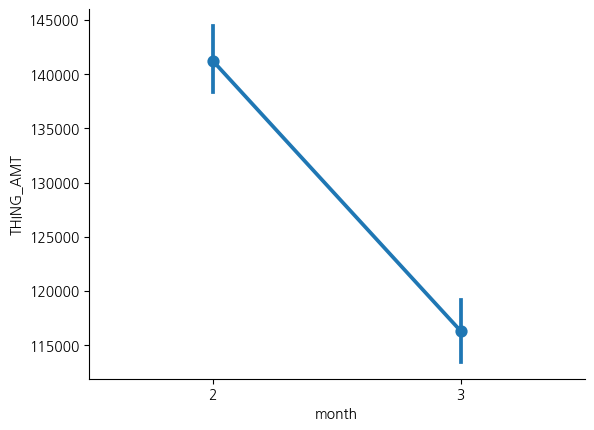

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.pointplot(x='month', y='THING_AMT', data=apt_df)
sns.despine()
plt.show()

In [11]:
corr_df = apt_df.loc[:, ['CTRT_DAY', 'THING_AMT', 'ARCH_AREA', 'CGG_NM', 'month']].reset_index(drop=True)
corr_df

,CTRT_DAY,THING_AMT,ARCH_AREA,CGG_NM,month
0,2025-03-22,142000,84.960,동대문구,3
1,2025-03-22,117000,59.970,동대문구,3
2,2025-03-21,140000,84.951,동작구,3
3,2025-03-21,86000,57.780,서대문구,3
4,2025-03-21,230000,81.840,강남구,3
...,...,...,...,...,...
7062,2025-02-11,145500,59.890,마포구,2
7063,2025-02-11,99400,59.640,강동구,2
7064,2025-02-11,145000,84.609,동작구,2
7065,2025-02-11,189000,65.100,양천구,2


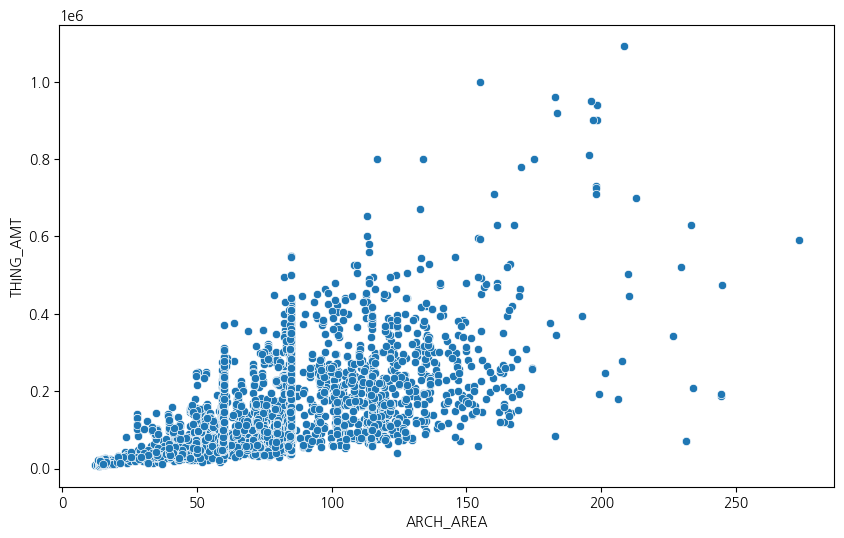

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='ARCH_AREA', y='THING_AMT', data=corr_df)
plt.show()

In [13]:
import pingouin as pg
pg.corr(corr_df['ARCH_AREA'], corr_df['THING_AMT']).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,7067,0.578,"[0.56, 0.59]",0.0,inf,1.0


In [14]:
corr_coef = pg.corr(corr_df['ARCH_AREA'], corr_df['THING_AMT']).round(3)['r'].values[0]
corr_coef

np.float64(0.578)

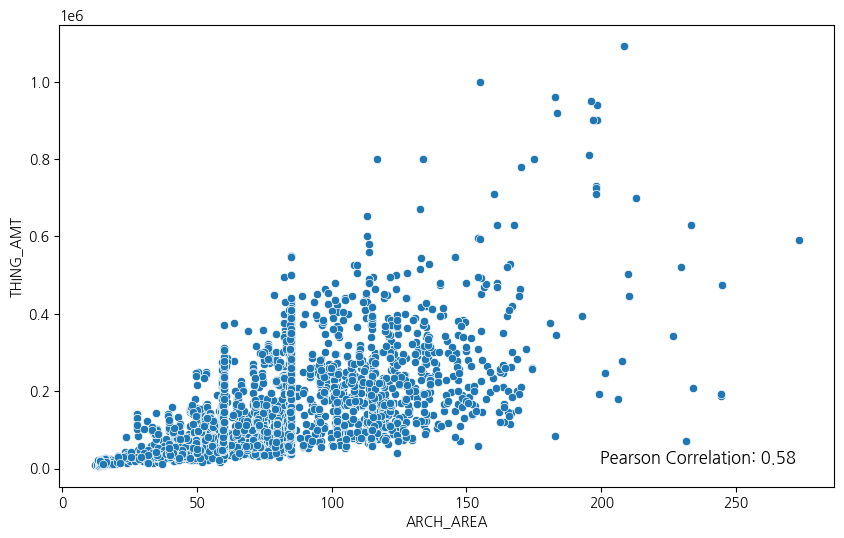

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='ARCH_AREA', y='THING_AMT', data=corr_df, ax=ax)
ax.text(0.95, 0.05, f'Pearson Correlation: {corr_coef:.2f}', transform=ax.transAxes, ha='right', fontsize=12)
plt.show()

## 자치구별 상관관계 계수 확인

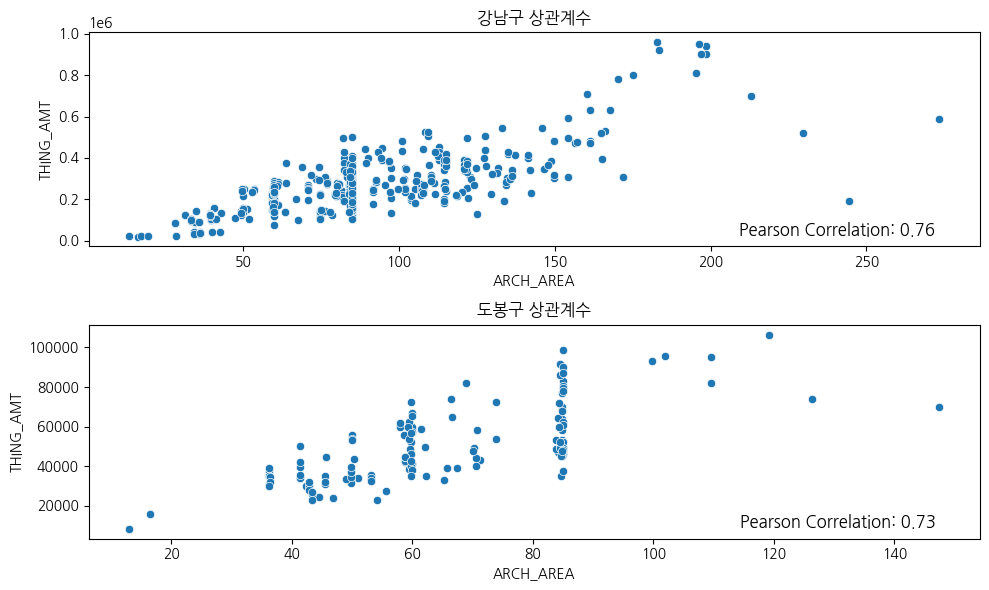

In [16]:
from matplotlib import font_manager, rc

plt.rcParams['font.family'] = "NanumGothic"

cgg_nm = ['강남구', '도봉구']

fig, ax = plt.subplots(figsize=(10, 6), nrows=2)
for i in range(len(cgg_nm)):
    cgg_df = corr_df[corr_df['CGG_NM']==cgg_nm[i]]
    corr_coef = pg.corr(cgg_df['ARCH_AREA'], cgg_df['THING_AMT']).round(3)['r'].values[0]
    sns.scatterplot(x='ARCH_AREA', y='THING_AMT', data=cgg_df, ax=ax[i])
    ax[i].text(0.95, 0.05, f'Pearson Correlation: {corr_coef:.2f}',
               transform=ax[i].transAxes, ha='right', fontsize=12)
    ax[i].set_title(f'{cgg_nm[i]} 상관계수')

plt.tight_layout()
plt.show()

## 회귀분석

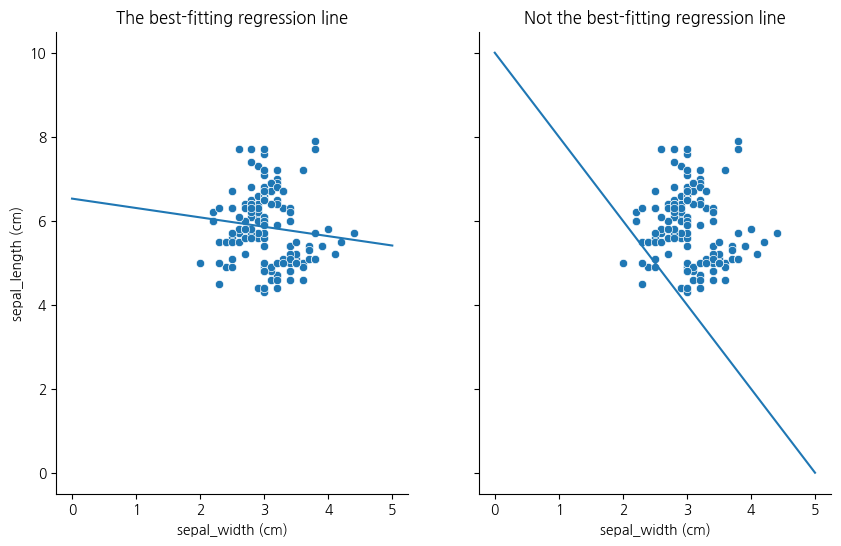

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# 종속변수: length, 독립변수: width
iris = sns.load_dataset('iris')
model = smf.ols(formula='sepal_length ~ sepal_width', data=iris).fit() 
intercept = model.params.Intercept # 절편
slope = model.params.sepal_width   # 기울기

fig, ax = plt.subplots(1, 2, figsize=(10,6), sharey=True)
x = np.linspace(0,5)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', ax=ax[0])
fig.axes[0].set_title('The best-fitting regression line')
fig.axes[0].set_xlabel('sepal_width (cm)')
fig.axes[0].set_ylabel('sepal_length (cm)')
fig.axes[0].plot(x, slope*x+intercept)

sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', ax=ax[1])
fig.axes[1].set_title('Not the best-fitting regression line')
fig.axes[1].set_xlabel('sepal_width (cm)')
fig.axes[1].set_ylabel('sepal_length (cm)')
fig.axes[1].plot(x, -2*x+10)
sns.despine()
plt.show()

In [19]:
mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [20]:
# 예측 변수 추가 -> 둘 중 무엇이 더 영향이 있나 
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'
mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51


In [21]:
iris[['sepal_length', 'sepal_width', 'petal_length']].rcorr()
# petal_length 강한 양의 관계 보임 -> 영향 크다

,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [22]:
mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [23]:
mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45
